# Naive Bayes

## Teoria

### O que é?

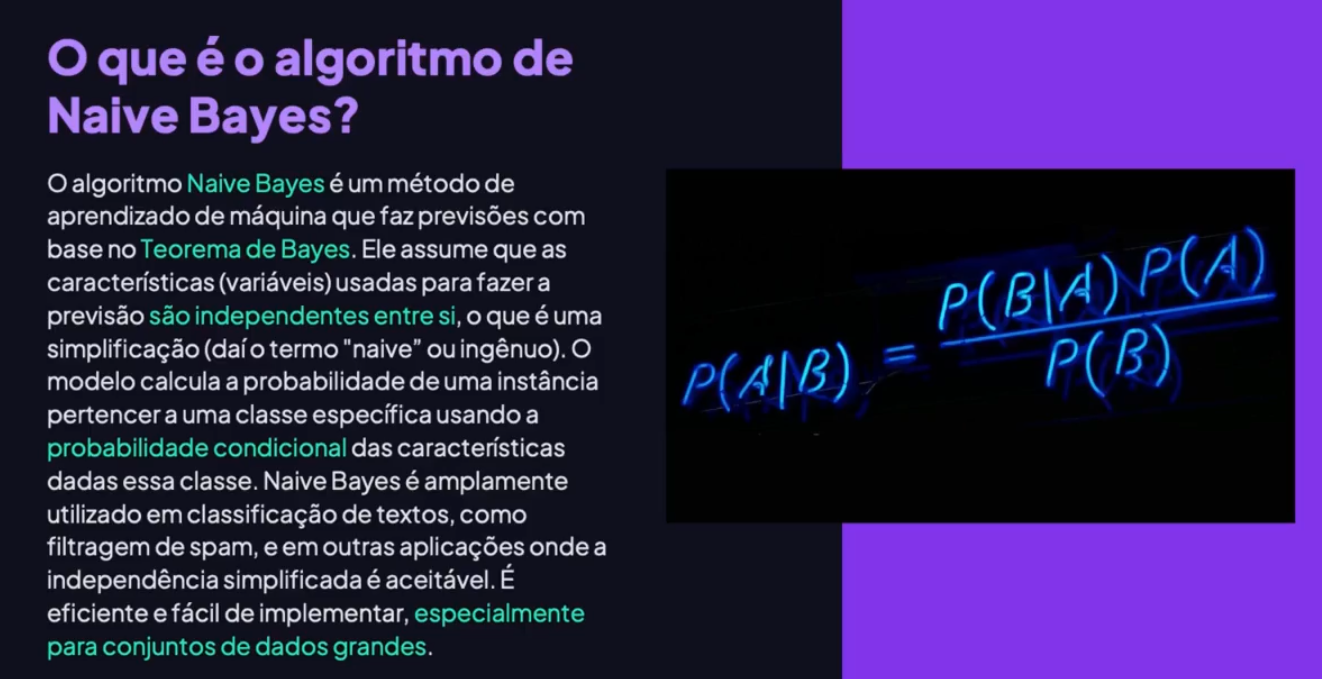

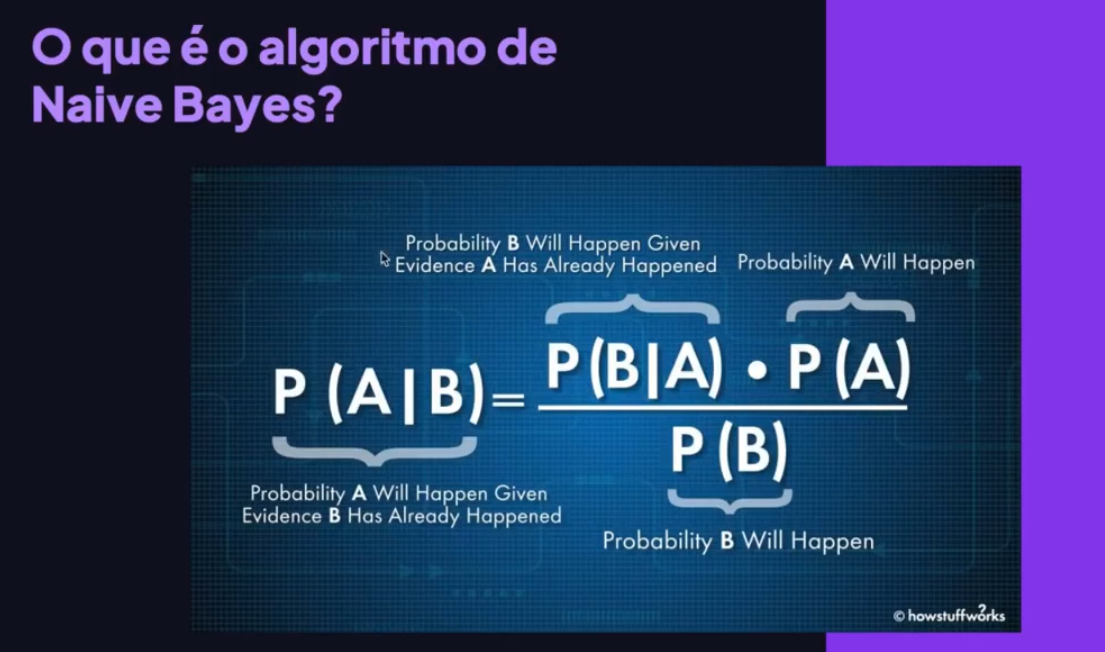

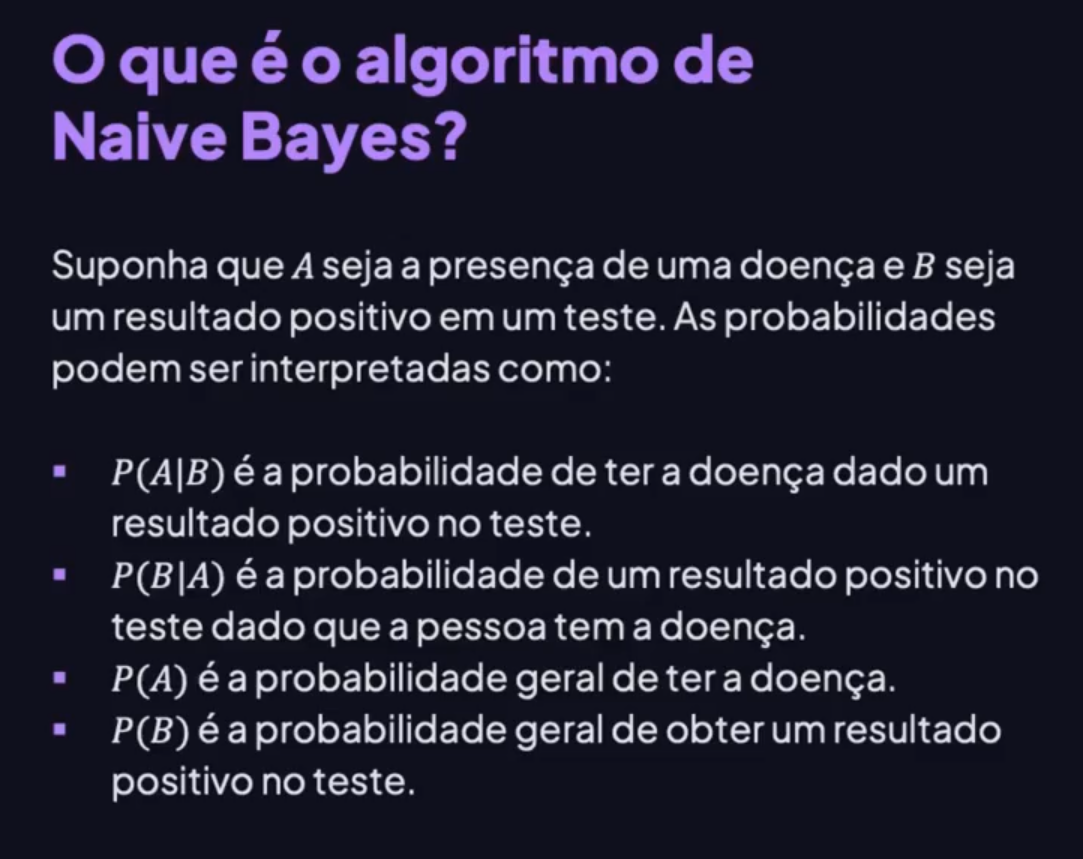

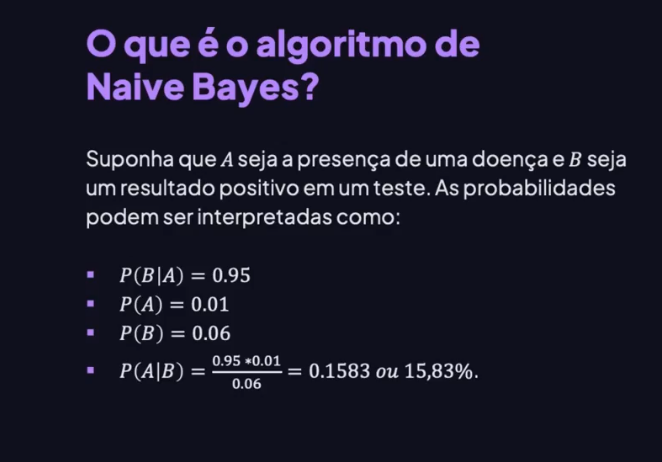

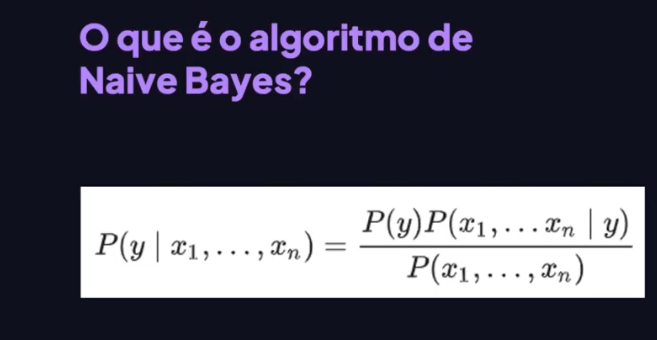

### Métricas de classificação

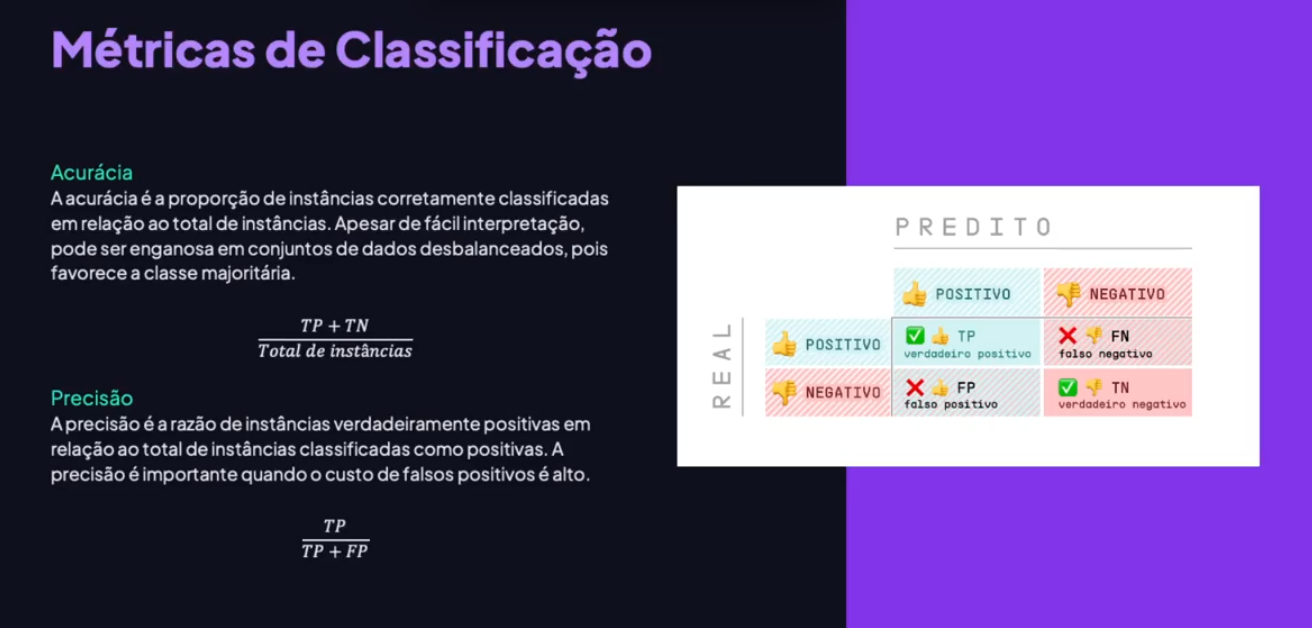

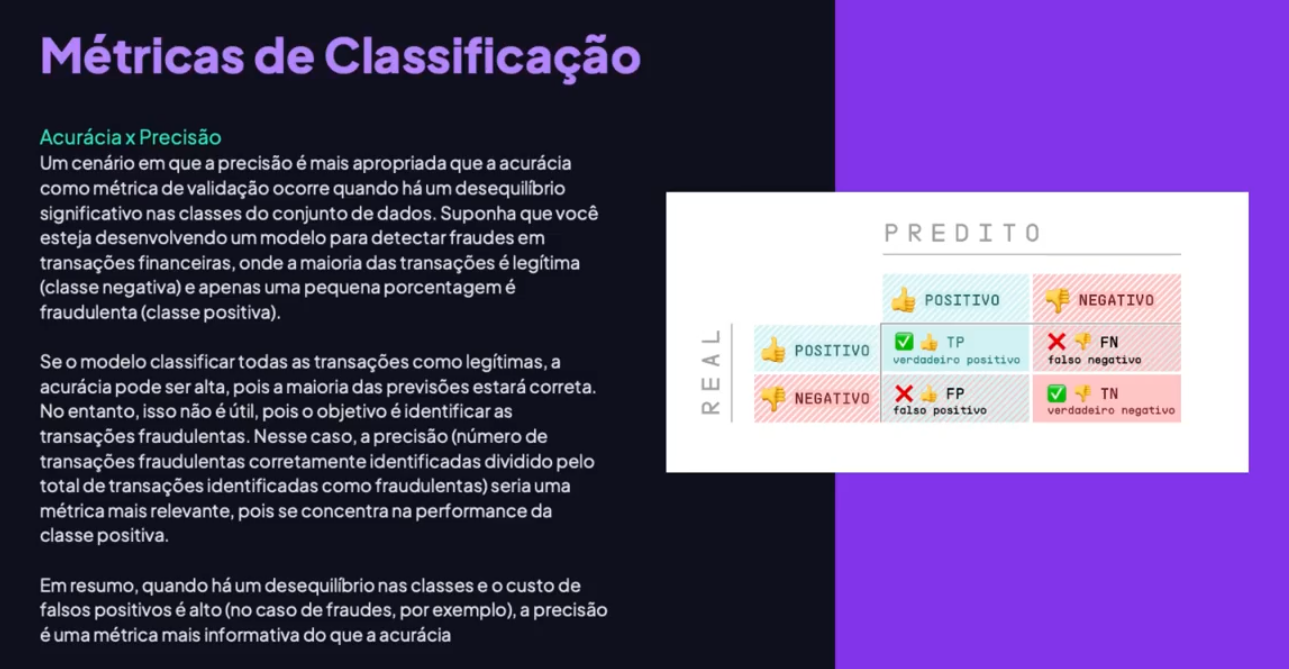

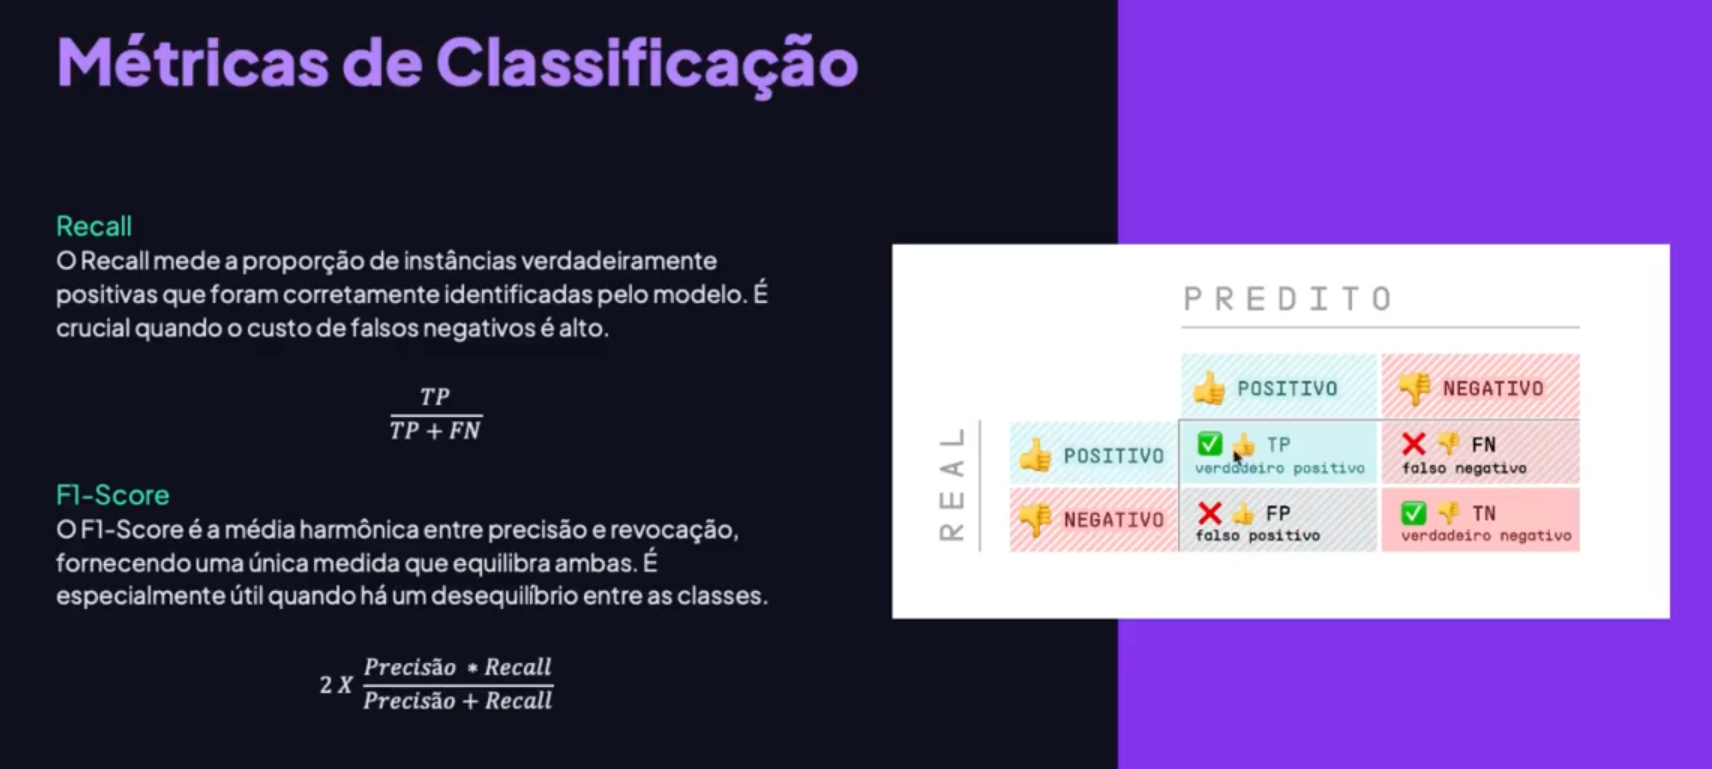

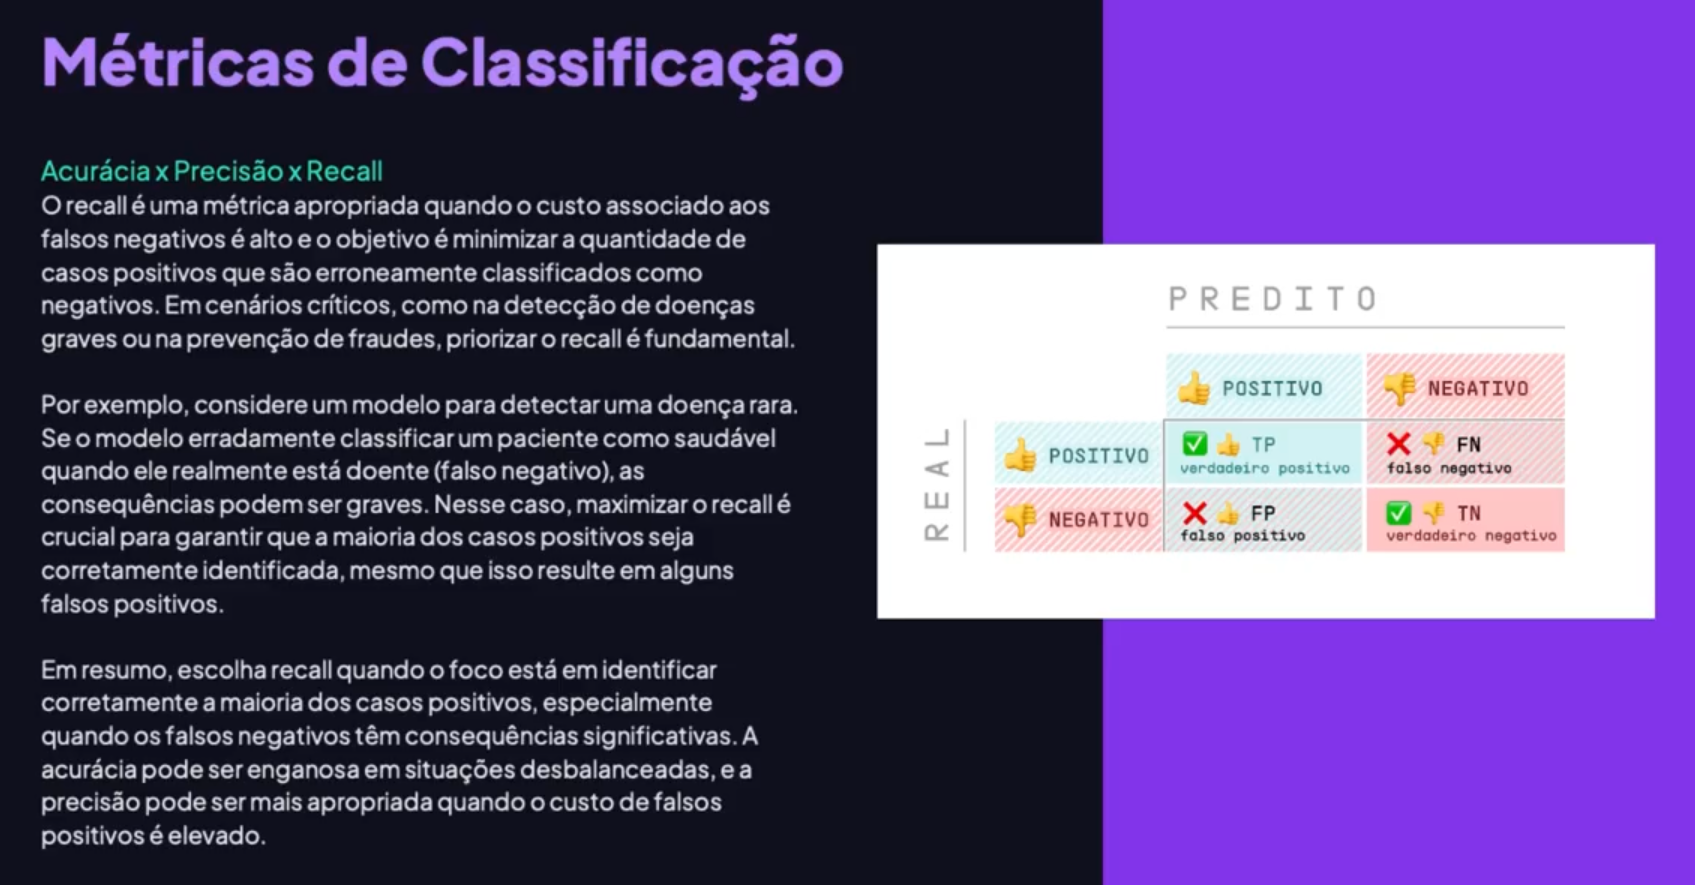

### Descrição do projeto

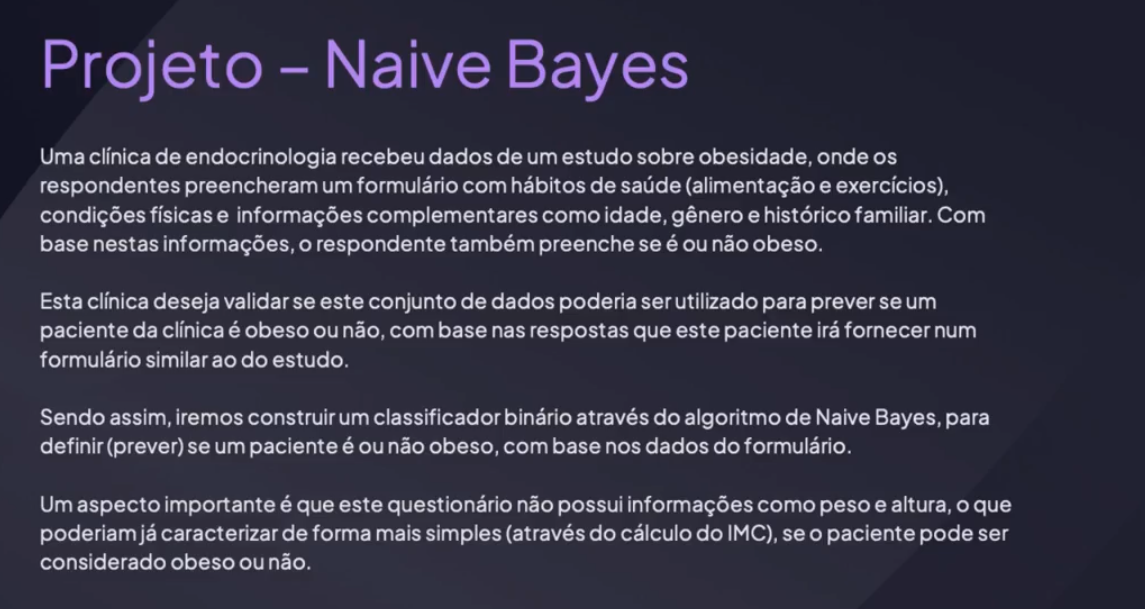

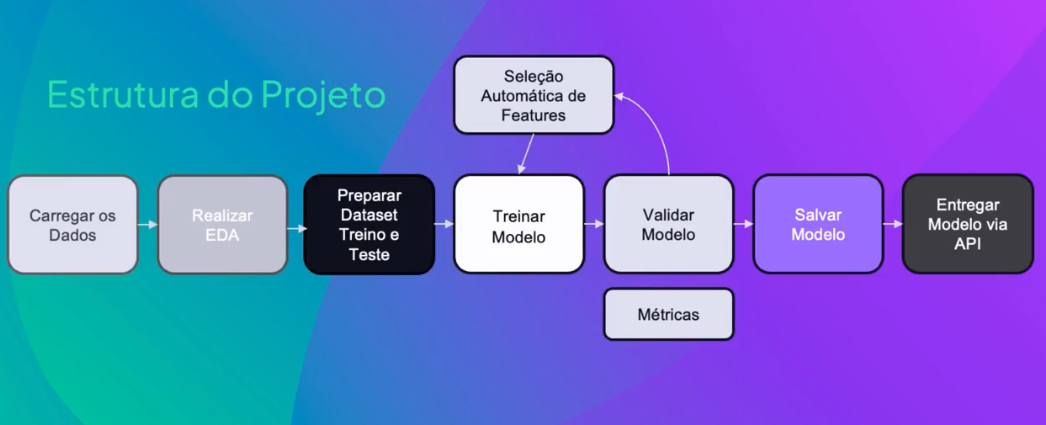

## Importações

`pipenv install pandas plotly matplotlib statsmodels nbformat ipykernel scikit-learn ipywidgets sweetviz flask pydantic Flask-Pydantic pyarrow optuna numpy==1.23.4 -d --skip-lock --python 3.9`

### Imports

In [1]:
# EDA
import pandas as pd
import statsmodels.api as sm
import plotly.express as px
import plotly.figure_factory as ff
import matplotlib.pyplot as plt
import sweetviz as sv

In [2]:
# Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, recall_score

In [3]:
# Otimização de Hiperparâmetros
import optuna

### Carregamento dos dados

In [4]:
# Importando o dataset
df_obesidade = pd.read_csv('./dataset/dataset_obesidade.csv')

In [5]:
# Mostrar 5 primeiras linhas do dataset
df_obesidade.head(5)

Genero_Masculino  Idade  Historico_Familiar_Sobrepeso  \
0                 0   21.0                             1   
1                 0   21.0                             1   
2                 1   23.0                             1   
3                 1   27.0                             0   
4                 1   22.0                             0   

   Consumo_Alta_Caloria_Com_Frequencia  Consumo_Vegetais_Com_Frequencia  \
0                                    0                              2.0   
1                                    0                              3.0   
2                                    0                              2.0   
3                                    0                              3.0   
4                                    0                              2.0   

   Refeicoes_Dia  Consumo_Alimentos_entre_Refeicoes  Fumante  Consumo_Agua  \
0            3.0                                  1        0           2.0   
1            3.0                                  1        1           3.0   
2            3.0                                  1        0           2.0   
3            3.0                                  1        0           2.0   
4            1.0                                  1        0           2.0   

   Monitora_Calorias_Ingeridas  Nivel_Atividade_Fisica  Nivel_Uso_Tela  \
0                            0                     0.0             1.0   
1                            1                     3.0             0.0   
2                            0                     2.0             1.0   
3                            0                     2.0             0.0   
4                            0                     0.0             0.0   

   Consumo_Alcool  Transporte_Automovel  Transporte_Bicicleta  \
0               0                     0                     0   
1               1                     0                     0   
2               2                     0                     0   
3               2                     0                     0   
4               1                     0                     0   

   Transporte_Motocicleta  Transporte_Publico  Transporte_Caminhada  Obeso  
0                       0                   1                     0      0  
1                       0                   1                     0      0  
2                       0                   1                     0      0  
3                       0                   0                     1      0  
4                       0                   1                     0      0

In [6]:
# Mostrar os últimos 5 registros
df_obesidade.tail(5)

Genero_Masculino      Idade  Historico_Familiar_Sobrepeso  \
2106                 0  20.976842                             1   
2107                 0  21.982942                             1   
2108                 0  22.524036                             1   
2109                 0  24.361936                             1   
2110                 0  23.664709                             1   

      Consumo_Alta_Caloria_Com_Frequencia  Consumo_Vegetais_Com_Frequencia  \
2106                                    1                              3.0   
2107                                    1                              3.0   
2108                                    1                              3.0   
2109                                    1                              3.0   
2110                                    1                              3.0   

      Refeicoes_Dia  Consumo_Alimentos_entre_Refeicoes  Fumante  Consumo_Agua  \
2106            3.0                                  1        0      1.728139   
2107            3.0                                  1        0      2.005130   
2108            3.0                                  1        0      2.054193   
2109            3.0                                  1        0      2.852339   
2110            3.0                                  1        0      2.863513   

      Monitora_Calorias_Ingeridas  Nivel_Atividade_Fisica  Nivel_Uso_Tela  \
2106                            0                1.676269        0.906247   
2107                            0                1.341390        0.599270   
2108                            0                1.414209        0.646288   
2109                            0                1.139107        0.586035   
2110                            0                1.026452        0.714137   

      Consumo_Alcool  Transporte_Automovel  Transporte_Bicicleta  \
2106               1                     0                     0   
2107               1                     0                     0   
2108               1                     0                     0   
2109               1                     0                     0   
2110               1                     0                     0   

      Transporte_Motocicleta  Transporte_Publico  Transporte_Caminhada  Obeso  
2106                       0                   1                     0      1  
2107                       0                   1                     0      1  
2108                       0                   1                     0      1  
2109                       0                   1                     0      1  
2110                       0                   1                     0      1

In [7]:
# Mostrar informações do dataset
df_obesidade.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 19 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Genero_Masculino                     2111 non-null   int64  
 1   Idade                                2111 non-null   float64
 2   Historico_Familiar_Sobrepeso         2111 non-null   int64  
 3   Consumo_Alta_Caloria_Com_Frequencia  2111 non-null   int64  
 4   Consumo_Vegetais_Com_Frequencia      2111 non-null   float64
 5   Refeicoes_Dia                        2111 non-null   float64
 6   Consumo_Alimentos_entre_Refeicoes    2111 non-null   int64  
 7   Fumante                              2111 non-null   int64  
 8   Consumo_Agua                         2111 non-null   float64
 9   Monitora_Calorias_Ingeridas          2111 non-null   int64  
 10  Nivel_Atividade_Fisica               2111 non-null   float64
 11  Nivel_Uso_Tela                

In [8]:
# Converter colunas para tipo inteiro
lista_colunas_float = [
  'Idade',
  'Consumo_Vegetais_Com_Frequencia',
  'Refeicoes_Dia',
  'Consumo_Agua',
  'Nivel_Atividade_Fisica',
  'Nivel_Uso_Tela'
]

df_obesidade[lista_colunas_float] = df_obesidade[lista_colunas_float].astype(int)

In [9]:
# Detectar valores ausentes
df_obesidade.isna().sum()

Genero_Masculino                       0
Idade                                  0
Historico_Familiar_Sobrepeso           0
Consumo_Alta_Caloria_Com_Frequencia    0
Consumo_Vegetais_Com_Frequencia        0
Refeicoes_Dia                          0
Consumo_Alimentos_entre_Refeicoes      0
Fumante                                0
Consumo_Agua                           0
Monitora_Calorias_Ingeridas            0
Nivel_Atividade_Fisica                 0
Nivel_Uso_Tela                         0
Consumo_Alcool                         0
Transporte_Automovel                   0
Transporte_Bicicleta                   0
Transporte_Motocicleta                 0
Transporte_Publico                     0
Transporte_Caminhada                   0
Obeso                                  0
dtype: int64

## EDA

### Distribuição das variáveis

In [10]:
# Distribuição da Variável Target - Total
px.bar(df_obesidade.value_counts('Obeso'))

In [11]:
# Distribuição da Variável Target - Percentual
px.bar(df_obesidade.value_counts('Obeso') / len(df_obesidade) * 100)

In [12]:
# Análise univariada - Idade
px.histogram(df_obesidade, x='Idade')

In [13]:
# Análise univariada - Idade 2
px.box(df_obesidade, y='Idade')

In [14]:
# Análise de variáveis binárias (categorias) - Genero_Masculino
px.bar(df_obesidade.value_counts('Genero_Masculino') / len(df_obesidade) * 100)

In [15]:
# Análise de variáveis binárias (categorias) - Historico_Familiar_Sobrepeso
px.bar(df_obesidade.value_counts('Historico_Familiar_Sobrepeso') / len(df_obesidade) * 100)

In [16]:
# Análise de variáveis binárias (categorias) - Nivel_Atividade_Fisica
px.bar(df_obesidade.value_counts('Nivel_Atividade_Fisica') / len(df_obesidade) * 100)

In [17]:
# Análise de variáveis binárias (categorias) - Nivel_Uso_Tela
px.bar(df_obesidade.value_counts('Nivel_Uso_Tela') / len(df_obesidade) * 100)

### Hipóteses

In [18]:
# Formulação de Hipóteses
# 1. A faixa etária está associada à obesidade?
df_obesidade['Idade'].describe()

count    2111.000000
mean       23.972525
std         6.308664
min        14.000000
25%        19.000000
50%        22.000000
75%        26.000000
max        61.000000
Name: Idade, dtype: float64

In [19]:
# Bucketing da variável Idade
bins_faixa_etaria = [10, 20, 30, 40, 50, 60, 70]
bins_faixa_etaria_ordinal = [0, 1, 2, 3, 4, 5]
labels_faixa_etaria = ['10-20', '20-30', '30-40', '40-50', '50-60', '60-70']

df_obesidade['Faixa_Etaria_String'] = pd.cut(df_obesidade['Idade'], bins=bins_faixa_etaria, labels=labels_faixa_etaria, include_lowest=True)
df_obesidade['Faixa_Etaria'] = pd.cut(df_obesidade['Idade'], bins=bins_faixa_etaria, labels=bins_faixa_etaria_ordinal, include_lowest=True)

In [20]:
df_obesidade

Genero_Masculino  Idade  Historico_Familiar_Sobrepeso  \
0                    0     21                             1   
1                    0     21                             1   
2                    1     23                             1   
3                    1     27                             0   
4                    1     22                             0   
...                ...    ...                           ...   
2106                 0     20                             1   
2107                 0     21                             1   
2108                 0     22                             1   
2109                 0     24                             1   
2110                 0     23                             1   

      Consumo_Alta_Caloria_Com_Frequencia  Consumo_Vegetais_Com_Frequencia  \
0                                       0                                2   
1                                       0                                3   
2                                       0                                2   
3                                       0                                3   
4                                       0                                2   
...                                   ...                              ...   
2106                                    1                                3   
2107                                    1                                3   
2108                                    1                                3   
2109                                    1                                3   
2110                                    1                                3   

      Refeicoes_Dia  Consumo_Alimentos_entre_Refeicoes  Fumante  Consumo_Agua  \
0                 3                                  1        0             2   
1                 3                                  1        1             3   
2                 3                                  1        0             2   
3                 3                                  1        0             2   
4                 1                                  1        0             2   
...             ...                                ...      ...           ...   
2106              3                                  1        0             1   
2107              3                                  1        0             2   
2108              3                                  1        0             2   
2109              3                                  1        0             2   
2110              3                                  1        0             2   

      Monitora_Calorias_Ingeridas  ...  Nivel_Uso_Tela  Consumo_Alcool  \
0                               0  ...               1               0   
1                               1  ...               0               1   
2                               0  ...               1               2   
3                               0  ...               0               2   
4                               0  ...               0               1   
...                           ...  ...             ...             ...   
2106                            0  ...               0               1   
2107                            0  ...               0               1   
2108                            0  ...               0               1   
2109                            0  ...               0               1   
2110                            0  ...               0               1   

      Transporte_Automovel  Transporte_Bicicleta  Transporte_Motocicleta  \
0                        0                     0                       0   
1                        0                     0                       0   
2                        0                     0                       0   
3                        0                     0                       0   
4                        0                     0                      

In [21]:
# Criar tabela de contingência
tabela_contingencia_faixa_etaria = sm.stats.Table.from_data(df_obesidade[['Obeso', 'Faixa_Etaria_String']])
tabela_contingencia_faixa_etaria.table_orig

Faixa_Etaria_String  10-20  20-30  30-40  40-50  50-60  60-70
Obeso                                                        
0                      498    489    131     13      7      1
1                      176    649    127     19      1      0

In [22]:
# Teste de Qui-Quadrado
print(tabela_contingencia_faixa_etaria.test_nominal_association())

df          5
pvalue      0.0
statistic   170.1116865347508


p_value < 0.05 rejeitamos H0, portanto as varíaveis não são independentes

In [23]:
# Automatizar EDA
sv_obesidade_report = sv.analyze(df_obesidade, target_feat='Obeso')

                                             |          | [  0%]   00:00 -> (? left)


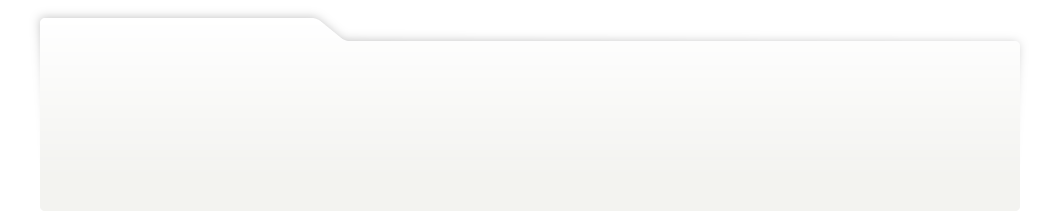
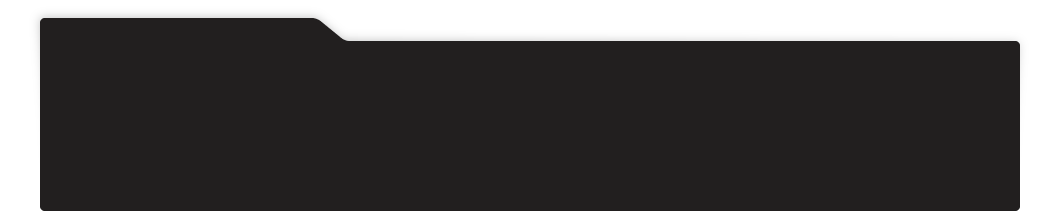
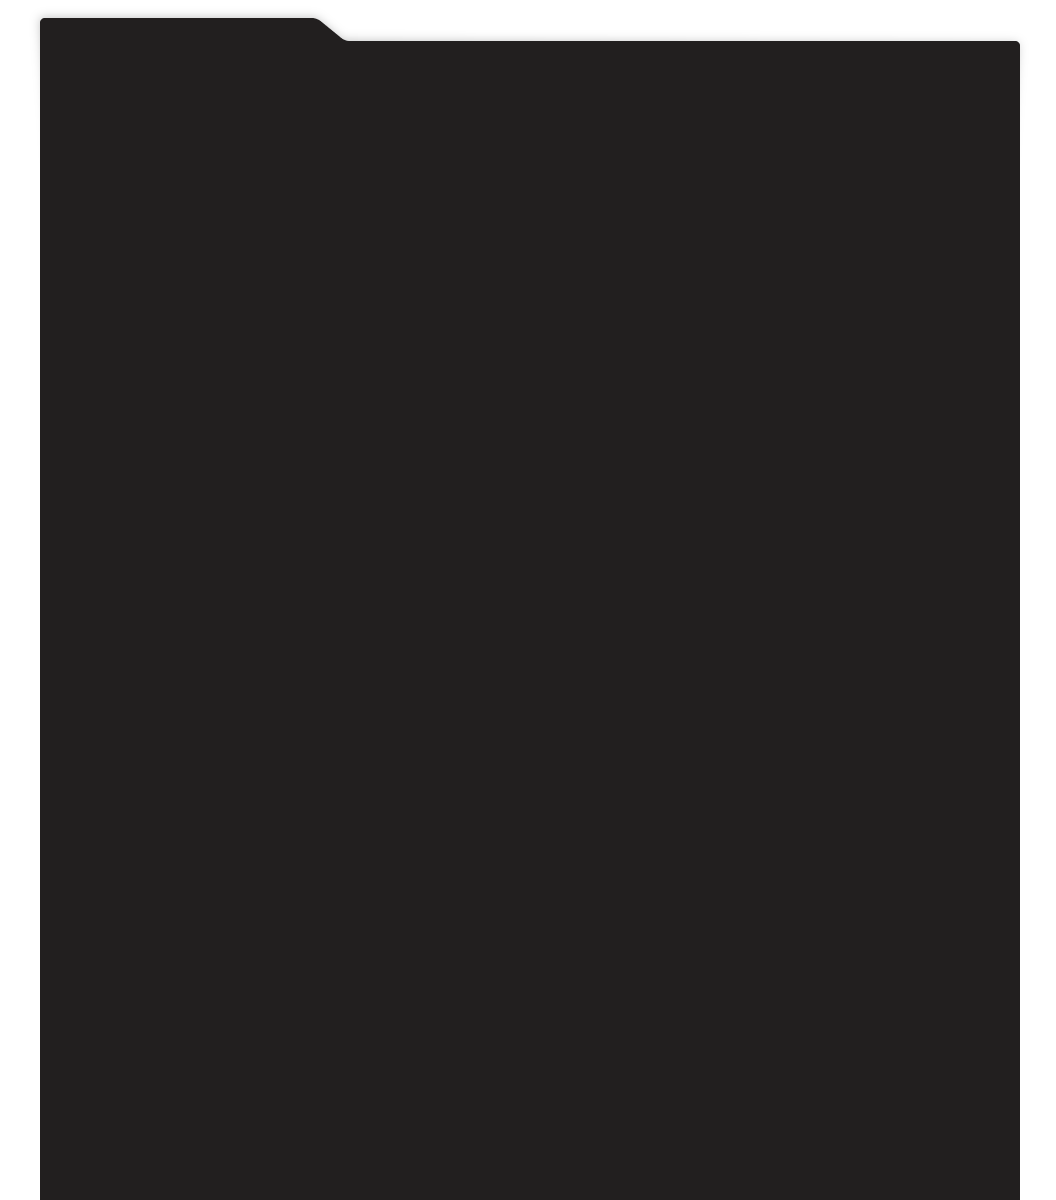
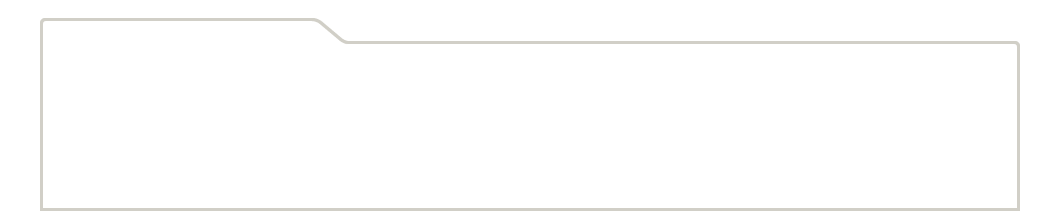
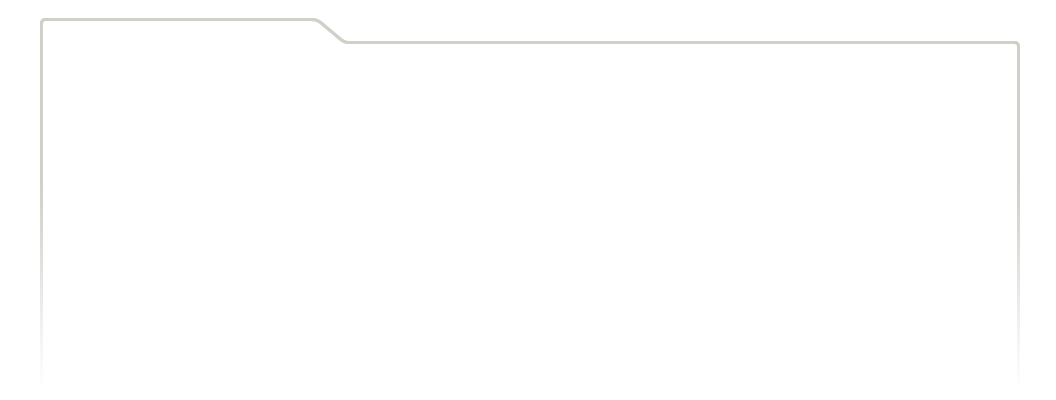
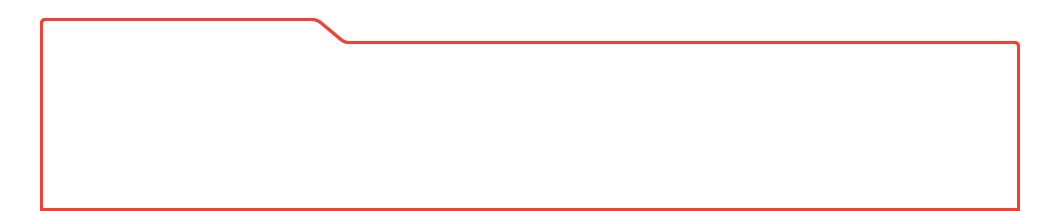
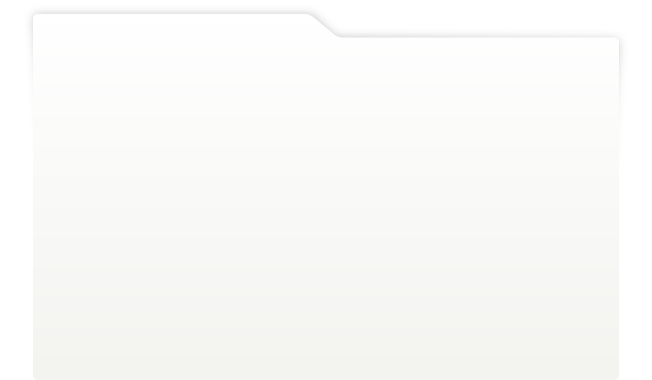
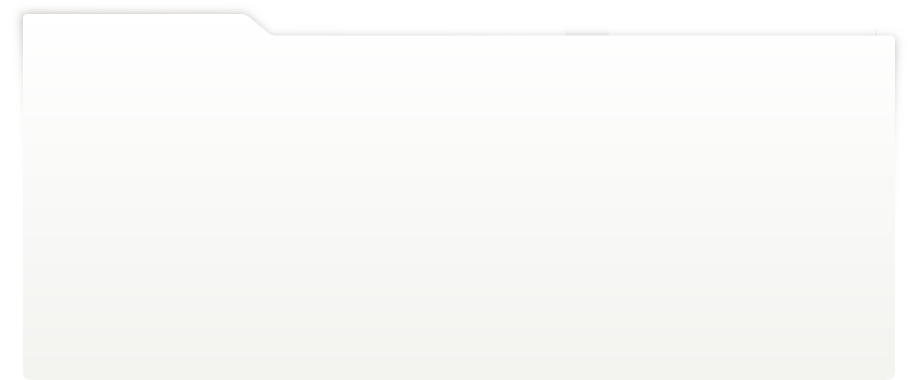
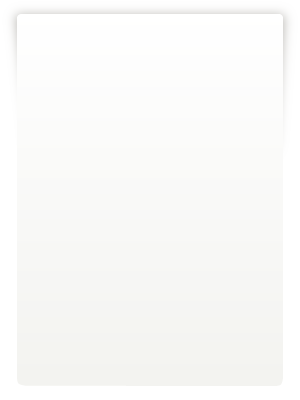
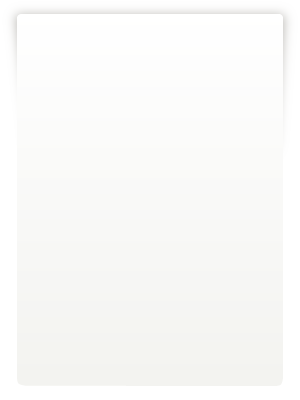
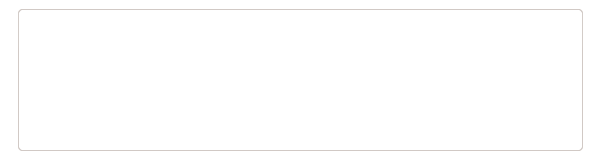
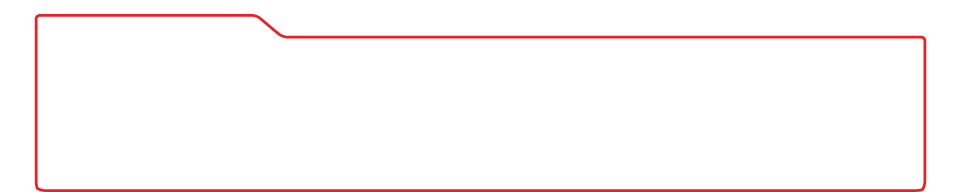
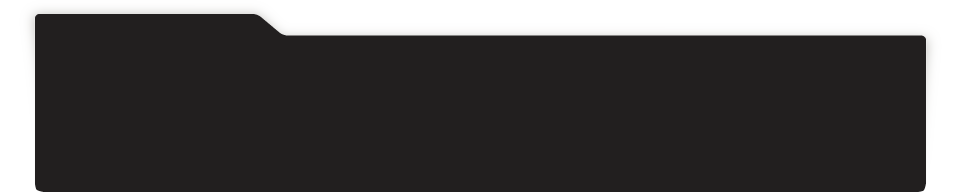
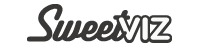
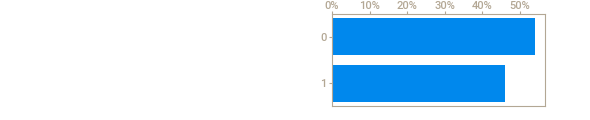
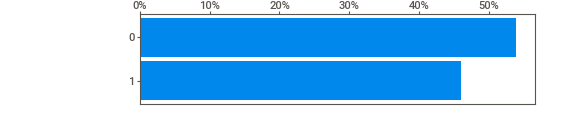
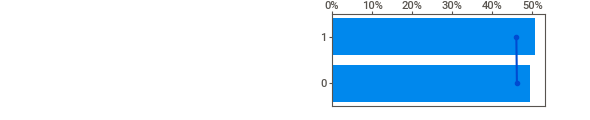
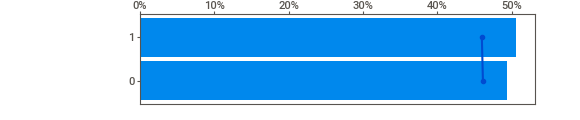
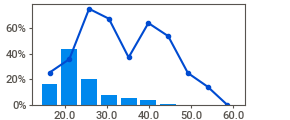
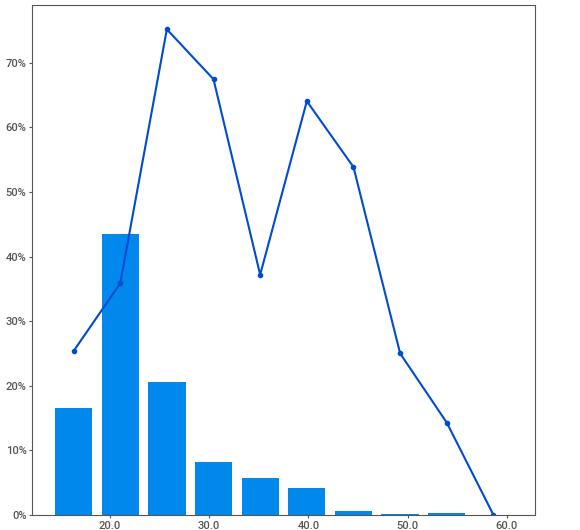
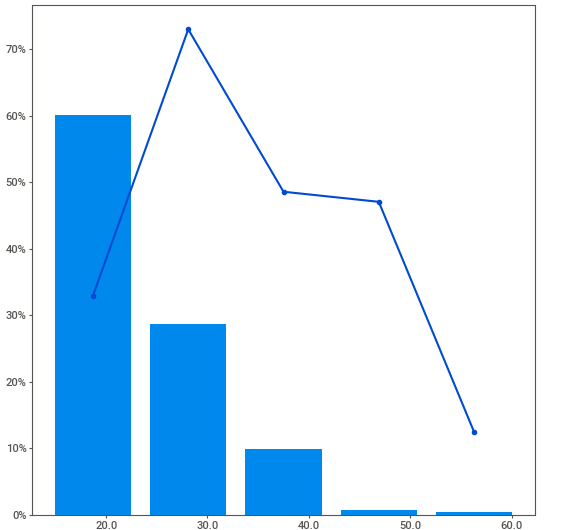
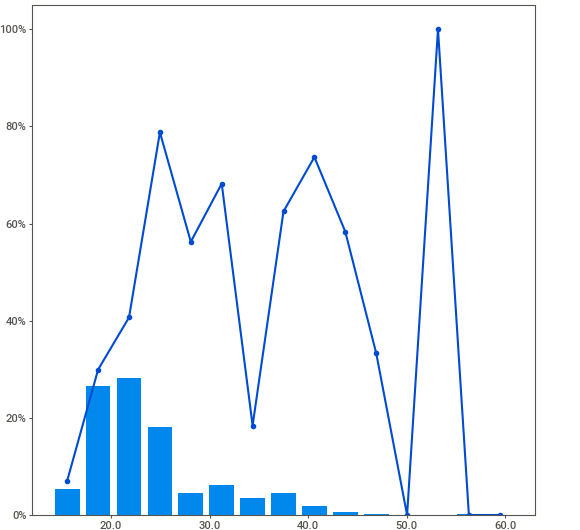
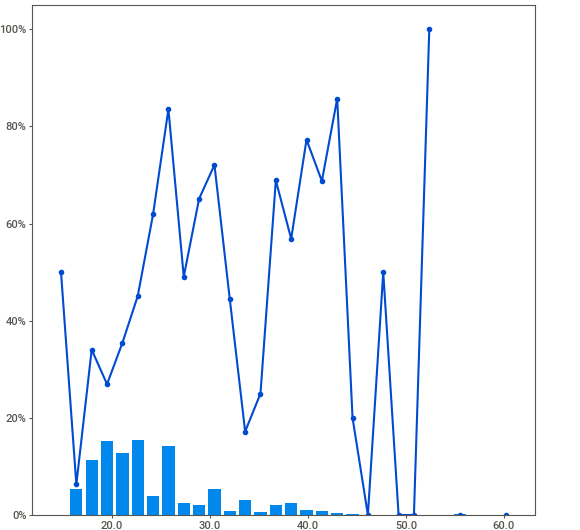
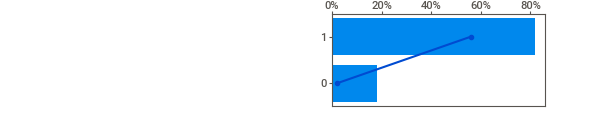
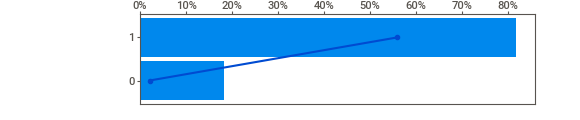
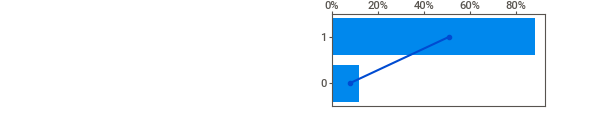
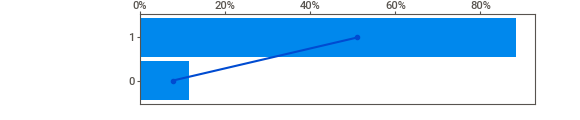
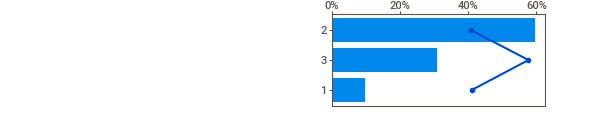
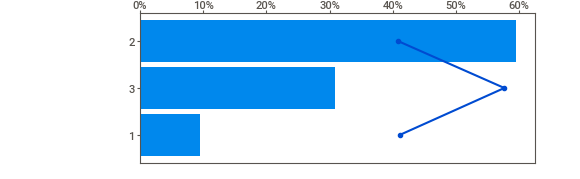
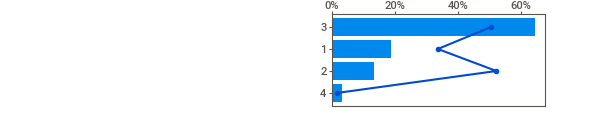
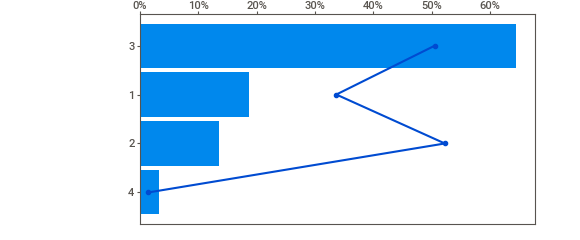
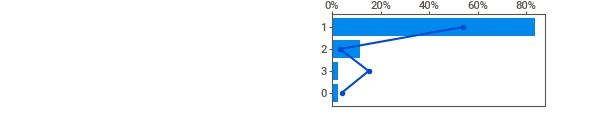
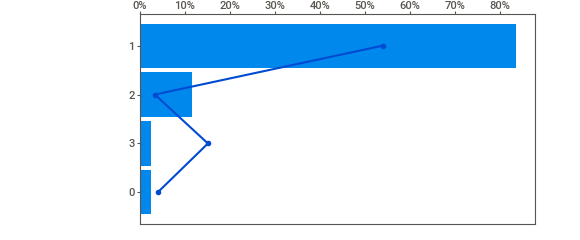
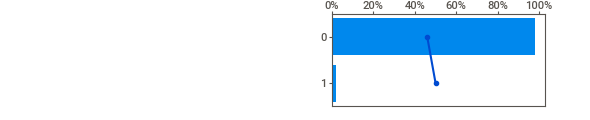
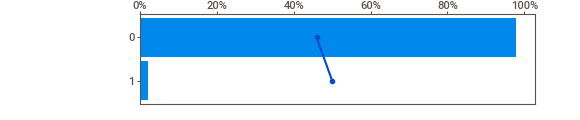
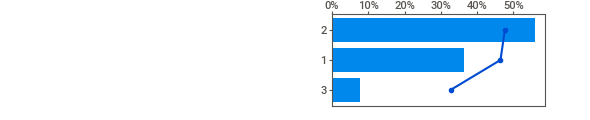
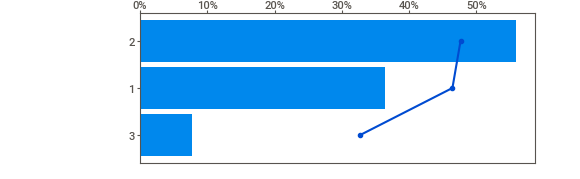
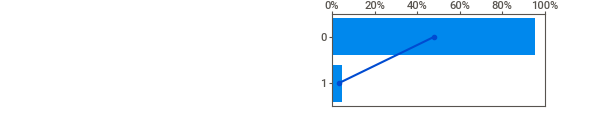
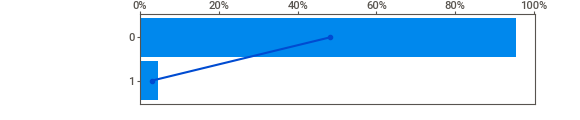
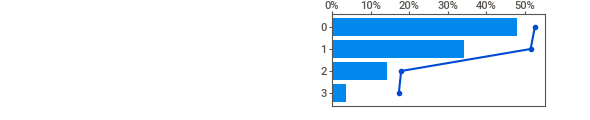
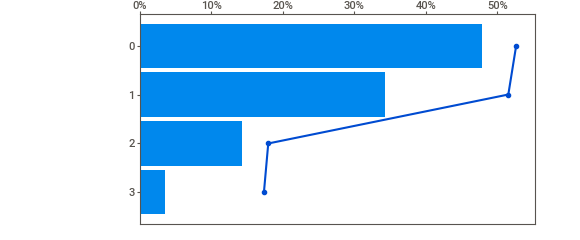
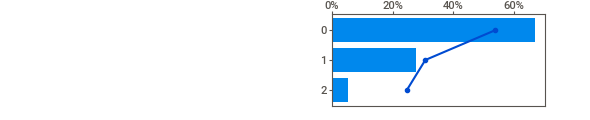
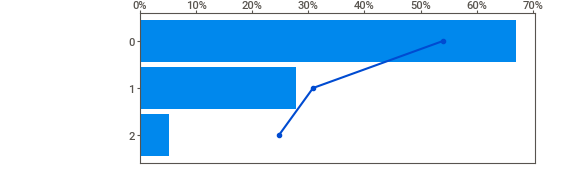
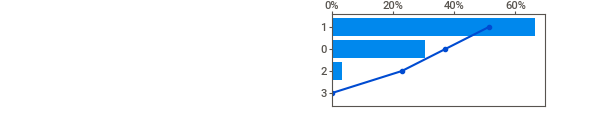
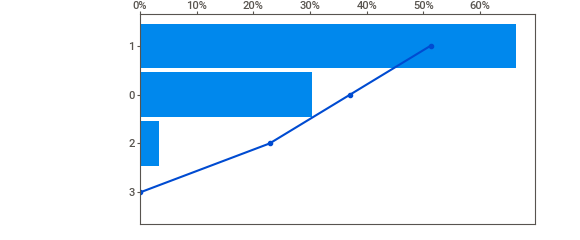
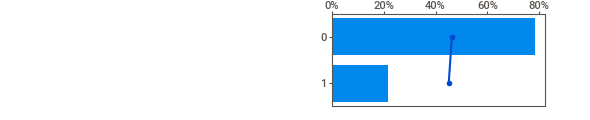
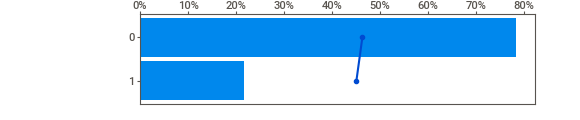
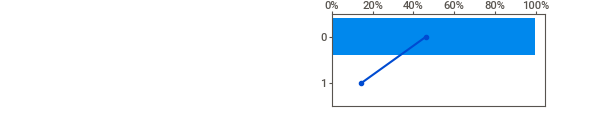
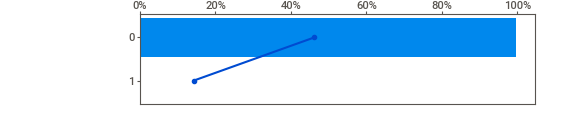
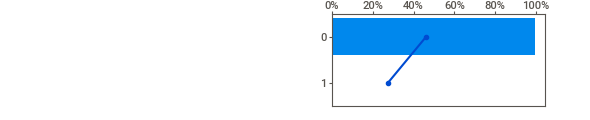
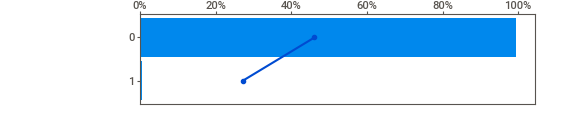
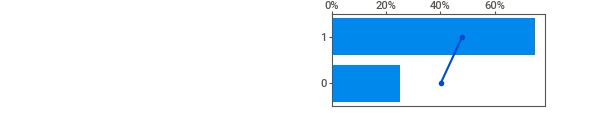
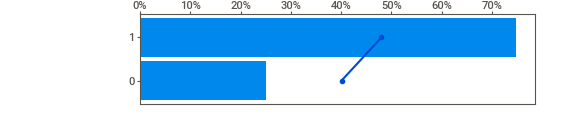
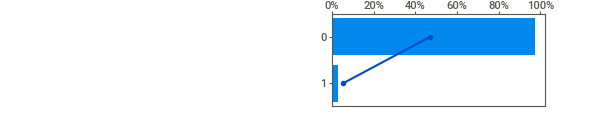
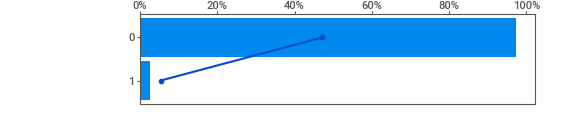
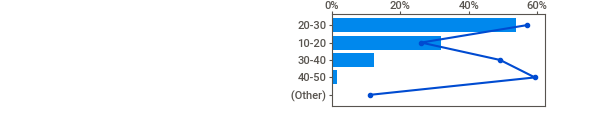
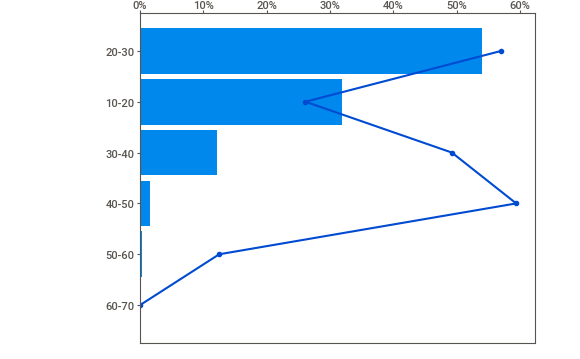
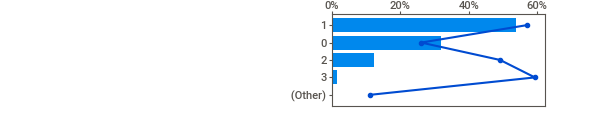
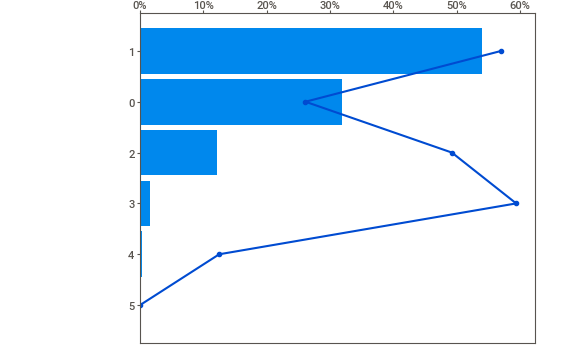
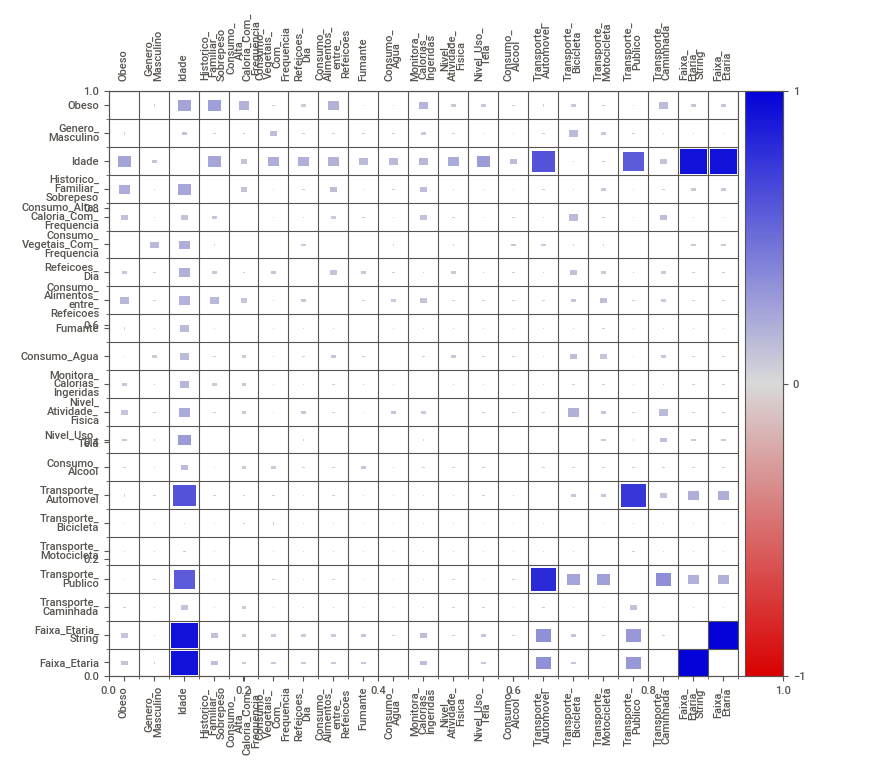
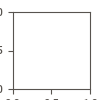

In [24]:
# Mostrar o relatório
sv_obesidade_report.show_notebook()

## Treinamento do modelo - Baseline

### Treinamento

In [25]:
# Dividir o dataset em X e y
X = df_obesidade.drop(columns=['Obeso', 'Faixa_Etaria_String', 'Idade'])
y = df_obesidade['Obeso']

In [26]:
# Dividir dados de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=51, shuffle=True)

In [27]:
# Treinamento do modelo baseline
# 1. Instanciar o modelo
# O modelo baseline será o GaussianNB
# O modelo CategoricalNB é utilizado para variáveis categóricas, porém estava com um bug no ambiente e por isso não foi possível utilizá-lo
model_baseline = GaussianNB()
model_baseline.fit(X_train, y_train)

GaussianNB()

### Métricas do modelo

In [28]:
# Predizer os valores do conjunto de teste
y_pred_baseline = model_baseline.predict(X_test)

In [30]:
# Avalição do desempenho do modelo baseline
# average='macro' é utilizado para calcular a média ponderada das métricas para cada classe
# é utilizado quando as classes estão balanceadas
# Se as classes estiverem desbalanceadas, é recomendado utilizar average='weighted'
classification_report_str = classification_report(y_test, y_pred_baseline)
recall_score_baseline = recall_score(y_test, y_pred_baseline, average='macro')

In [31]:
# Relatório de Classificação
print(f'Relatório de Classificação:\n{classification_report_str}')
print(f'Recall Score\n {recall_score_baseline:.2%}')

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.94      0.60      0.73       339
           1       0.67      0.96      0.79       295

    accuracy                           0.76       634
   macro avg       0.81      0.78      0.76       634
weighted avg       0.82      0.76      0.76       634

Recall Score
 77.59%


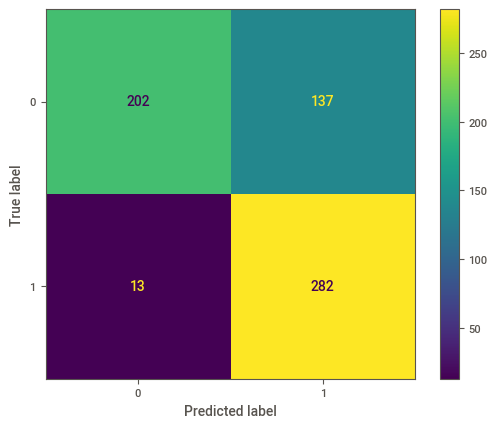

In [32]:
# Mostrar matriz de confusão
# Serve para visualizar o desempenho do modelo em cada classe
# Quanto mais próximo da diagonal principal, melhor é o desempenho do modelo
# Quanto mais próximo da diagonal secundária, pior é o desempenho do modelo
cm_modelo_baseline = confusion_matrix(y_test, y_pred_baseline)
display_baseline = ConfusionMatrixDisplay(cm_modelo_baseline, display_labels=model_baseline.classes_)
display_baseline.plot()

## Treinamento modelo - Automated Feature Selection

### Treinamento KBest

In [54]:
# Seleção das melhores features com SelectKBest
# 1. Instanciar o SelectKBest
# chi2 é utilizado para variáveis categóricas
# f_classif é utilizado para variáveis numéricas
# k é o número de features que serão selecionadas
# Se k=None, todas as features serão selecionadas
# Se k=1, a feature mais importante será selecionada
# Se k=2, as 2 features mais importantes serão selecionadas
# E assim por diante...
kBest = SelectKBest(score_func=chi2, k=8)
X_train_kbest = kBest.fit_transform(X_train, y_train)

In [55]:
# Quais são as features selecionadas?
kbest_features = kBest.get_support(indices=True)
X_train_best_features = X_train.iloc[:, kbest_features]
X_train_best_features.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1477 entries, 301 to 2105
Data columns (total 8 columns):
 #   Column                               Non-Null Count  Dtype   
---  ------                               --------------  -----   
 0   Historico_Familiar_Sobrepeso         1477 non-null   int64   
 1   Consumo_Alta_Caloria_Com_Frequencia  1477 non-null   int64   
 2   Consumo_Alimentos_entre_Refeicoes    1477 non-null   int64   
 3   Monitora_Calorias_Ingeridas          1477 non-null   int64   
 4   Nivel_Atividade_Fisica               1477 non-null   int64   
 5   Nivel_Uso_Tela                       1477 non-null   int64   
 6   Transporte_Caminhada                 1477 non-null   int64   
 7   Faixa_Etaria                         1477 non-null   category
dtypes: category(1), int64(7)
memory usage: 94.0 KB


In [56]:
# Treinar o modelo com as melhores features
model_kbest = GaussianNB()
model_kbest.fit(X_train_best_features, y_train)

GaussianNB()

### Métricas modelo Select KBest

In [57]:
# Filtrar as melhores features do conjunto de teste
X_test_kbest = kBest.transform(X_test)
X_test_best_features = X_test.iloc[:, kbest_features]

In [58]:
# Predizer os valores do conjunto de teste
y_pred_kbest = model_kbest.predict(X_test_best_features)

In [59]:
# Avaliar o modelo com as melhores features
classification_report_str_kbest = classification_report(y_test, y_pred_kbest)
recall_score_kbest = recall_score(y_test, y_pred_kbest, average='macro')
print(f'Relatório de Classificação (KBest):\n{classification_report_str_kbest}')
print(f'Recall Score (KBest):\n {recall_score_kbest:.2%}')

Relatório de Classificação (KBest):
              precision    recall  f1-score   support

           0       0.94      0.61      0.74       339
           1       0.68      0.95      0.79       295

    accuracy                           0.77       634
   macro avg       0.81      0.78      0.76       634
weighted avg       0.82      0.77      0.76       634

Recall Score (KBest):
 78.01%


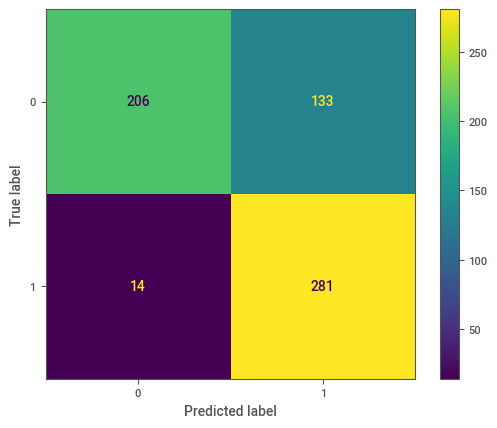

In [60]:
# Mostrar matriz de confusão KBest
cm_modelo_kbest = confusion_matrix(y_test, y_pred_kbest)
display_kbest = ConfusionMatrixDisplay(cm_modelo_kbest, display_labels=model_kbest.classes_)
display_kbest.plot()

## Tuning de Hiperpatâmetros

### Tuning

In [50]:
# Ajustar hiperparâmetros do SelectKBest
# k = k melhores features conforme chi2
def naivebayes_optuna(trial):
  k = trial.suggest_int('k', 1, 18)
  
  kbest = SelectKBest(score_func=chi2, k=k)
  
  X_train_kbest = kbest.fit_transform(X_train, y_train)
  
  kbest_features = kbest.get_support(indices=True)
  X_train_best_features = X_train.iloc[:, kbest_features]
  
	# Treinar modelo com melhores features
  model_kbest_optuna = GaussianNB()
  model_kbest_optuna.fit(X_train_best_features, y_train)
	
	# Aplicar o seletor de features no conjunto de teste
  X_test_kbest = kbest.transform(X_test)
  X_test_best_features = X_test.iloc[:, kbest_features]
	
	# Predizer os valores do conjunto de teste
  y_pred_kbest = model_kbest_optuna.predict(X_test_best_features)
	
	# Avaliar o recall score
  recall_score_optuna = recall_score(y_test, y_pred_kbest, average='macro')
	
  return k, recall_score_optuna

In [51]:
# Rodar o estudo de otimização dos hiperparâmetros
search_space = {
	'k': range(1, 19)
}
study_naivebayes = optuna.create_study(sampler=optuna.samplers.GridSampler(search_space=search_space), directions=['minimize', 'maximize'])
study_naivebayes.optimize(naivebayes_optuna, n_trials=50)

[I 2024-10-31 23:29:05,630] A new study created in memory with name: no-name-876b2ce0-a479-4cf3-9832-8aa7d57dc7f6
[I 2024-10-31 23:29:05,645] Trial 0 finished with values: [2.0, 0.6659517024148793] and parameters: {'k': 2}.


[I 2024-10-31 23:29:05,655] Trial 1 finished with values: [7.0, 0.748537573121344] and parameters: {'k': 7}.
[I 2024-10-31 23:29:05,667] Trial 2 finished with values: [9.0, 0.775681215939203] and parameters: {'k': 9}.
[I 2024-10-31 23:29:05,676] Trial 3 finished with values: [11.0, 0.7727313634318285] and parameters: {'k': 11}.
[I 2024-10-31 23:29:05,685] Trial 4 finished with values: [15.0, 0.7742062896855157] and parameters: {'k': 15}.
[I 2024-10-31 23:29:05,696] Trial 5 finished with values: [5.0, 0.6950002499875007] and parameters: {'k': 5}.
[I 2024-10-31 23:29:05,703] Trial 6 finished with values: [3.0, 0.6138143092845358] and parameters: {'k': 3}.
[I 2024-10-31 23:29:05,709] Trial 7 finished with values: [17.0, 0.775901204939753] and parameters: {'k': 17}.
[I 2024-10-31 23:29:05,714] Trial 8 finished with values: [18.0, 0.775901204939753] and parameters: {'k': 18}.
[I 2024-10-31 23:29:05,723] Trial 9 finished with values: [10.0, 0.780105994700265] and parameters: {'k': 10}.
[I 20

In [52]:
# Melhor resultado e hiperparâmetros
trial_best_recall = max(study_naivebayes.best_trials, key=lambda t: t.values[1])
print('Trial com maior recall e menor k: ')
print(f'\tTrial number: {trial_best_recall.number}')
print(f'\tparam (k): {trial_best_recall.params}')
print(f'\tvalues (k, recall): {trial_best_recall.values}')

Trial com maior recall e menor k: 
	Trial number: 10
	param (k): {'k': 8}
	values (k, recall): [8.0, 0.780105994700265]


In [53]:
# Mostrar gráfico de otimização com trials
fig = optuna.visualization.plot_pareto_front(study_naivebayes)
fig.show()

## Salvar modelo

In [61]:
import joblib
joblib.dump(model_kbest, './model_obesidade.pkl')

['./model_obesidade.pkl']